In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [24]:
def calculateVolatility(df):
    vol=[]
    numTradingDays = 252
    numTicksPerDay = 26
    logprice=np.log(df['Price'])
    vol.append(np.nan)
    for i in range(df.shape[0]-1):
        logdif=logprice[i+1]-logprice[i]
        difsq=logdif**2
        vol.append(np.sqrt(numTradingDays*numTicksPerDay*difsq))
    df['Volatility'] = vol
    df.dropna(subset=['Volatility'], inplace=True)
    
def flipOrder(df):
    df=df.reindex(index=df.index[::-1])
    df=df.reset_index()
    del df['index']
    return df

def setDateIndex(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')
    df.set_index('Date', drop=True, inplace=True)
    

def plotVolatility(df, stockName=''):
    fig = px.line(df, x=df.index, y=['Volatility'], title=f'{stockName} Volatility', template = 'plotly')
    fig.show()
       
def plotTweetCount(df, stockName=''):
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')
    fig = px.line(df, x=df['Date'], y=['Twitter Publication Count - Realtime (L1)'], title=f'{stockName} Twitter Publication Count', template = 'plotly')
    fig.show()

In [25]:
def plotIsoForestOutliers(df):
    # viz
    fig, ax = plt.subplots(figsize=(10,6))
    plt.title("Isolation Forest for Outlier Detection")
    plt.ylabel("Volatility")
    plt.xlabel("Date")

    # keep track of outliers
    outliers = df.loc[df['isoForestOutlier'] == -1, ['Volatility']] # outlier df 
    plt.plot(df.index, df['Volatility'], color='black')
    plt.scatter(outliers.index, outliers['Volatility'], color='red', label = 'Outlier')
    plt.legend()
    plt.show()
    
    
# Use of Isolation Forest to find outliers
def isoForestOutliers(df, outliers_fraction=.05):
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(df)
    scaledData = pd.DataFrame(np_scaled)

    model = IsolationForest(contamination=outliers_fraction)
    model.fit(scaledData)
    df['isoForestOutlier'] = model.predict(scaledData)
    
    plotIsoForestOutliers(df)

In [26]:
def plotLOFOutliers(df):
    # viz
    fig, ax = plt.subplots(figsize=(10,6))
    plt.title("Local Outlier Factor for Outlier Detection")
    plt.ylabel("Volatility")
    plt.xlabel("Date")

    # keep track of 
    outliers = df.loc[df['lofOutlier'] == -1, ['Volatility']] # outlier df 
    ax.plot(df.index, df['Volatility'], color='black')
    ax.scatter(outliers.index, outliers['Volatility'], color='red', label = 'Outlier')
    plt.legend()
    plt.show()
    
    
# Use of Isolation Forest to find outliers
def lofOutliers(df, outliers_fraction=.05):
    model = LocalOutlierFactor()
    df['lofOutlier'] = model.fit_predict(df)
    
    plotLOFOutliers(df)

In [27]:
def computeZscoreOutliers(df):
    standard_dev = np.std(df['Volatility'])
    mean = np.mean(df['Volatility'])
    outliersStdDev = df[(df['Volatility'] > mean+3*standard_dev) | (df['Volatility'] < mean-3*standard_dev)]
    return outliersStdDev

In [28]:
def findConsensusOutliers(df, zOutliers):
    consensusOutliers = zOutliers[(zOutliers['isoForestOutlier'] == -1) & (zOutliers['lofOutlier'] == -1)]

    # viz
    fig, ax = plt.subplots(figsize=(10,6))
    plt.title("Consensus Outlier Detection")
    plt.ylabel("Volatility")
    plt.xlabel("Date")

    # keep track of 
    ax.plot(df.index, df['Volatility'], color='black')
    ax.scatter(consensusOutliers.index, consensusOutliers['Volatility'], color='red', label = 'Outlier')
    plt.legend()
    plt.show()

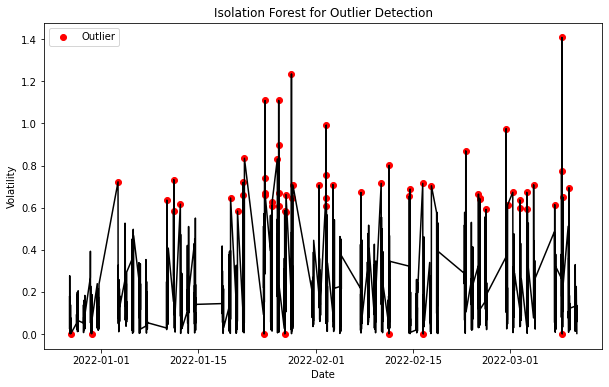

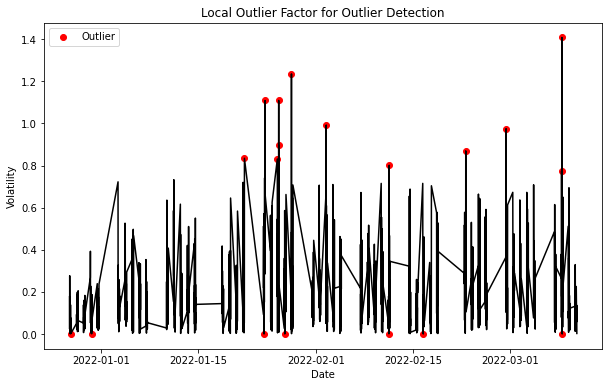

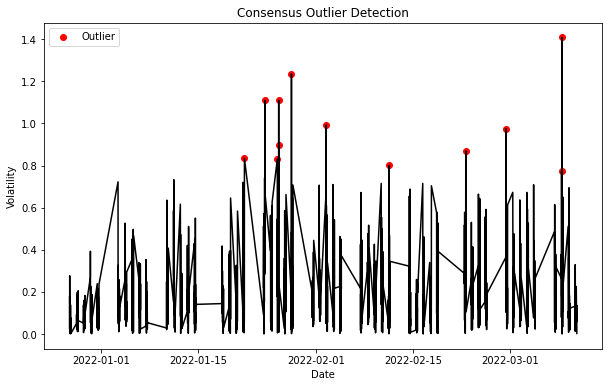

In [29]:
# Google
googl = pd.read_csv('google.csv')
googl = flipOrder(googl)
calculateVolatility(googl)
setDateIndex(googl)
plotVolatility(googl, stockName="Google")

googlVolDf = pd.DataFrame(googl['Volatility']) 

isoForestOutliers(googlVolDf)
lofOutliers(googlVolDf)
zOutliers = computeZscoreOutliers(googlVolDf)

findConsensusOutliers(googlVolDf, zOutliers)

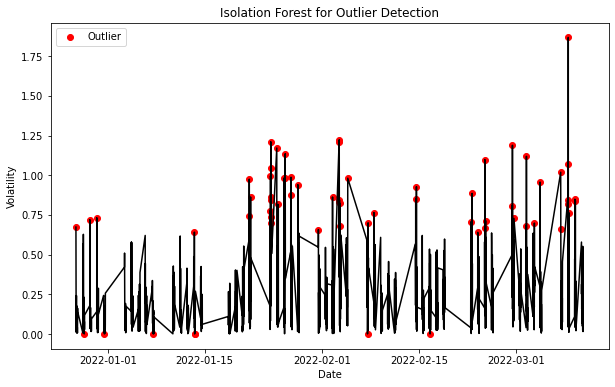

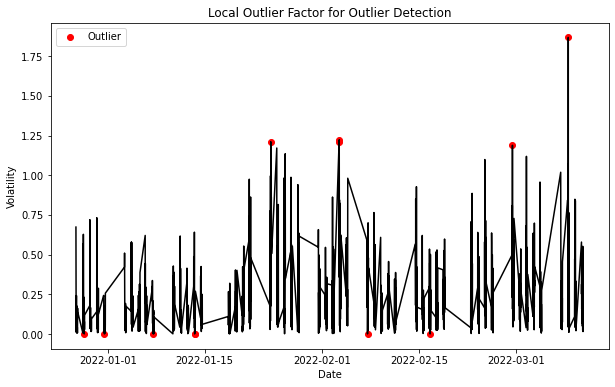

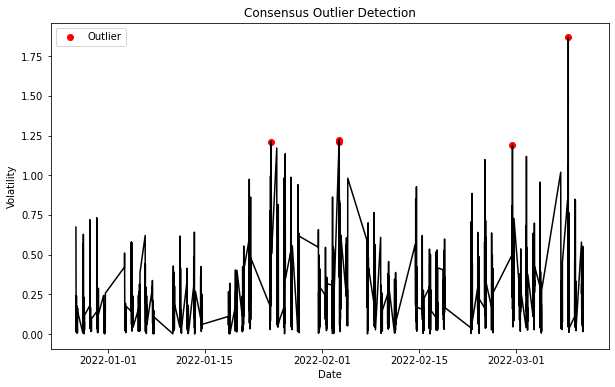

In [42]:
# Amazon
amzn = pd.read_csv('amazon.csv')
amzn = flipOrder(amzn)
calculateVolatility(amzn)
setDateIndex(amzn)
plotVolatility(amzn, stockName="Amazon")

amznVolDf = pd.DataFrame(amzn['Volatility']) 

isoForestOutliers(amznVolDf)
lofOutliers(amznVolDf)
zOutliers = computeZscoreOutliers(amznVolDf)

findConsensusOutliers(amznVolDf, zOutliers)

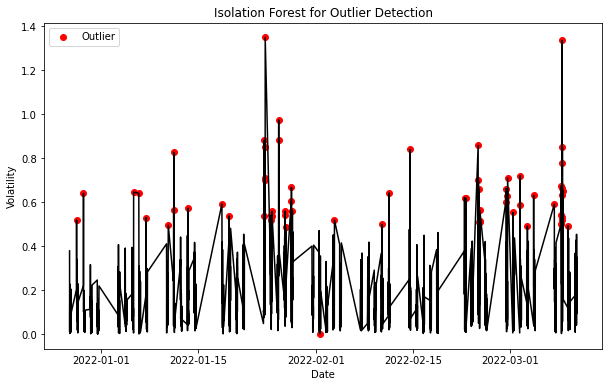

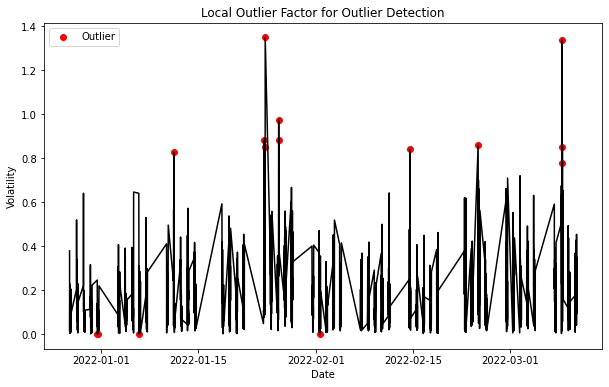

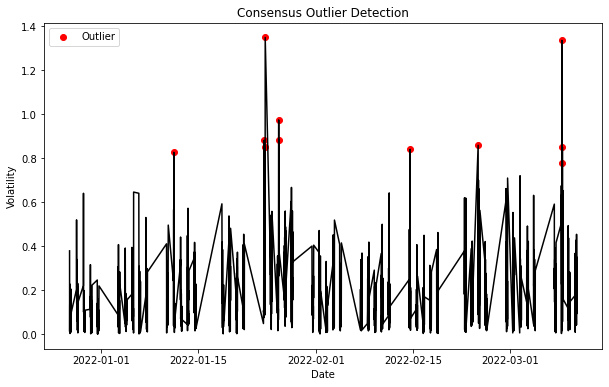

In [31]:
# Apple
aapl = pd.read_csv('apple.csv')
aapl = flipOrder(aapl)
calculateVolatility(aapl)
setDateIndex(aapl)
plotVolatility(aapl, stockName="Apple")

aaplVolDf = pd.DataFrame(aapl['Volatility']) 

isoForestOutliers(aaplVolDf)
lofOutliers(aaplVolDf)
zOutliers = computeZscoreOutliers(aaplVolDf)

findConsensusOutliers(aaplVolDf, zOutliers)

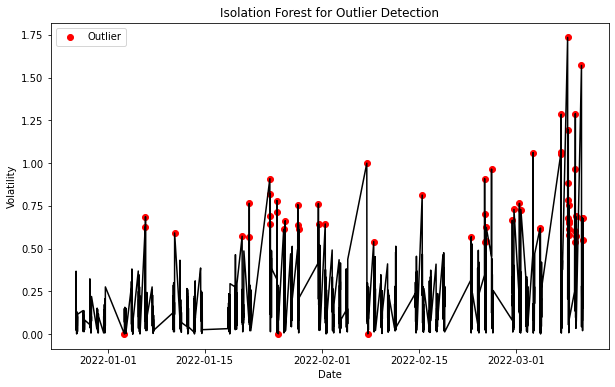

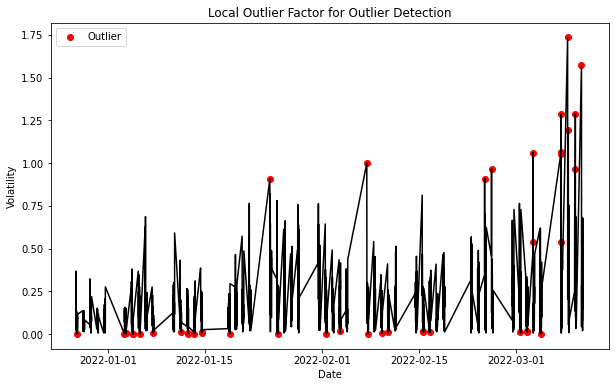

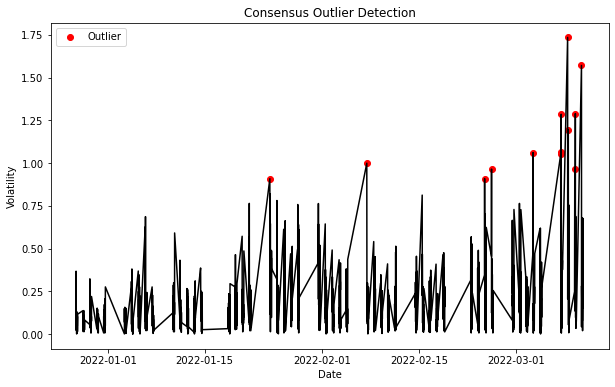

In [32]:
# Chevron
cvx = pd.read_csv('chevron.csv')
cvx = flipOrder(cvx)
calculateVolatility(cvx)
setDateIndex(cvx)
plotVolatility(cvx, stockName="Chevron")

cvxVolDf = pd.DataFrame(cvx['Volatility']) 

isoForestOutliers(cvxVolDf)
lofOutliers(cvxVolDf)
zOutliers = computeZscoreOutliers(cvxVolDf)

findConsensusOutliers(cvxVolDf, zOutliers)

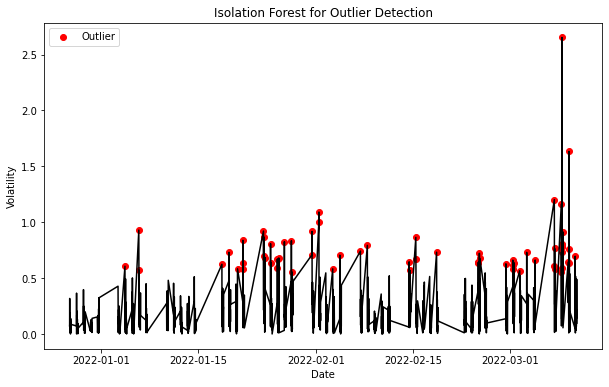

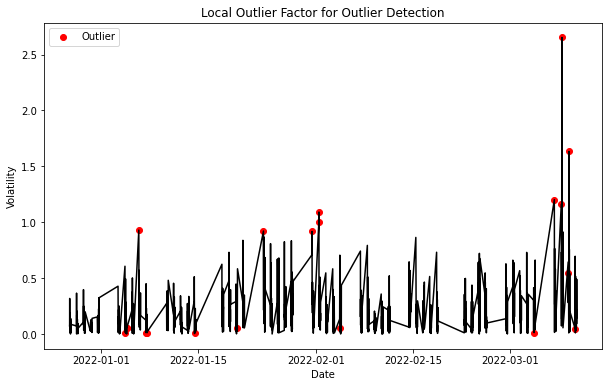

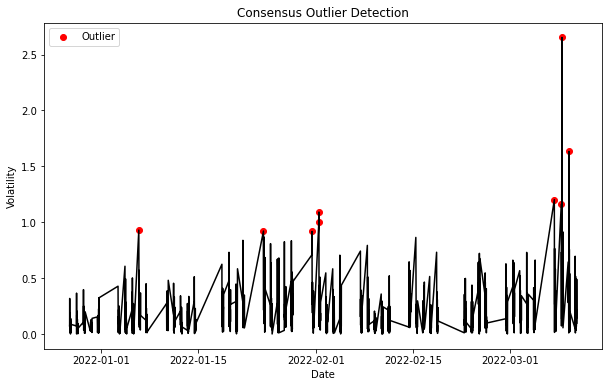

In [33]:
# Exxon
xom = pd.read_csv('exxon.csv')
xom = flipOrder(xom)
calculateVolatility(xom)
setDateIndex(xom)
plotVolatility(xom, stockName="Exxon")

xomVolDf = pd.DataFrame(xom['Volatility']) 

isoForestOutliers(xomVolDf)
lofOutliers(xomVolDf)
zOutliers = computeZscoreOutliers(xomVolDf)

findConsensusOutliers(xomVolDf, zOutliers)

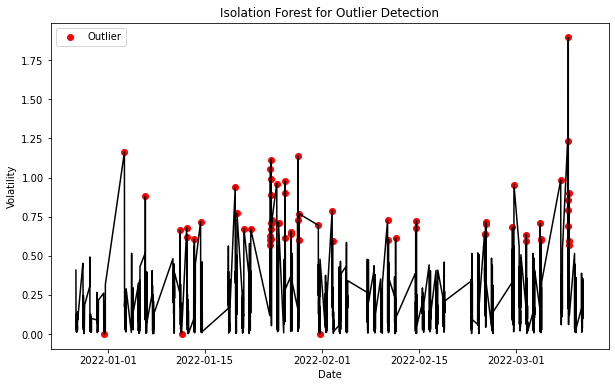

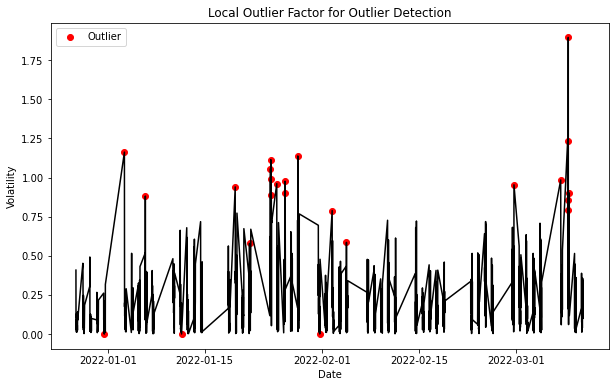

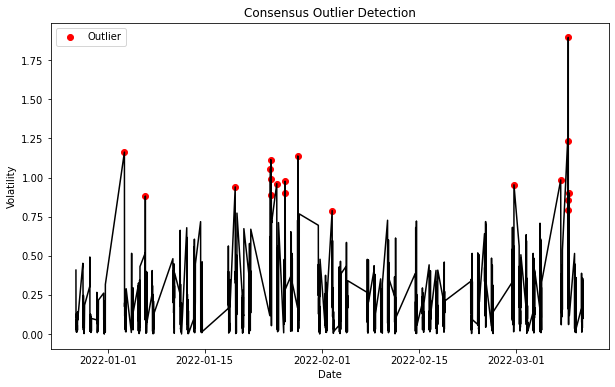

In [34]:
# Microsoft
msft = pd.read_csv('microsoft.csv')
msft = flipOrder(msft)
calculateVolatility(msft)
setDateIndex(msft)
plotVolatility(msft, stockName="Microsoft")

msftVolDf = pd.DataFrame(msft['Volatility']) 

isoForestOutliers(msftVolDf)
lofOutliers(msftVolDf)
zOutliers = computeZscoreOutliers(msftVolDf)

findConsensusOutliers(msftVolDf, zOutliers)

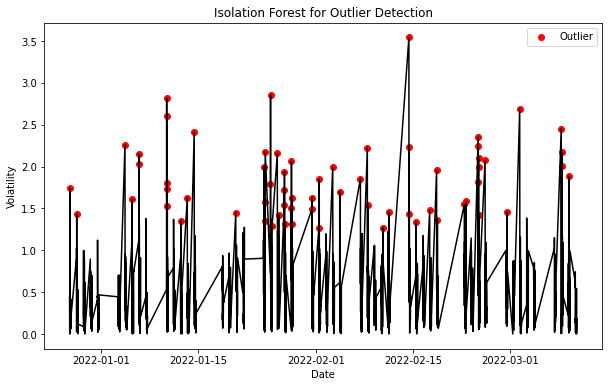

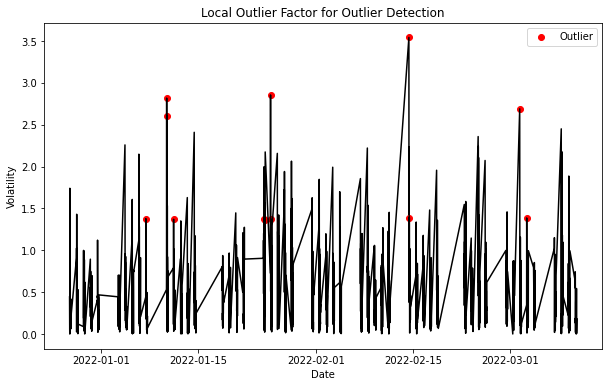

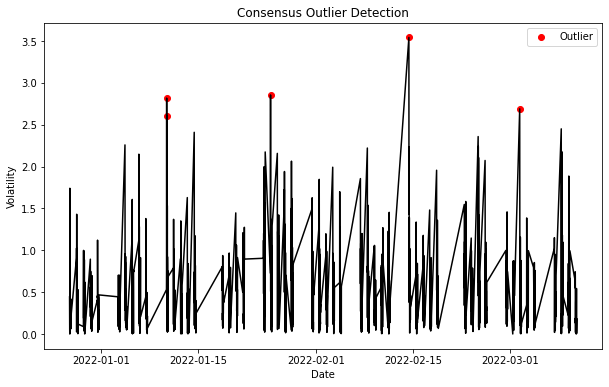

In [35]:
# Moderna
mrna = pd.read_csv('moderna.csv')
mrna = flipOrder(mrna)
calculateVolatility(mrna)
setDateIndex(mrna)
plotVolatility(mrna, stockName="Moderna")

mrnaVolDf = pd.DataFrame(mrna['Volatility']) 

isoForestOutliers(mrnaVolDf)
lofOutliers(mrnaVolDf)
zOutliers = computeZscoreOutliers(mrnaVolDf)

findConsensusOutliers(mrnaVolDf, zOutliers)

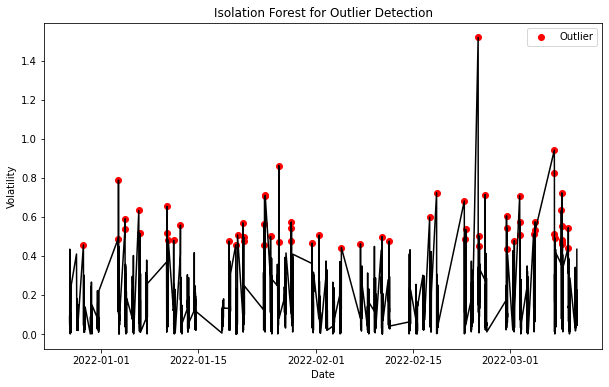

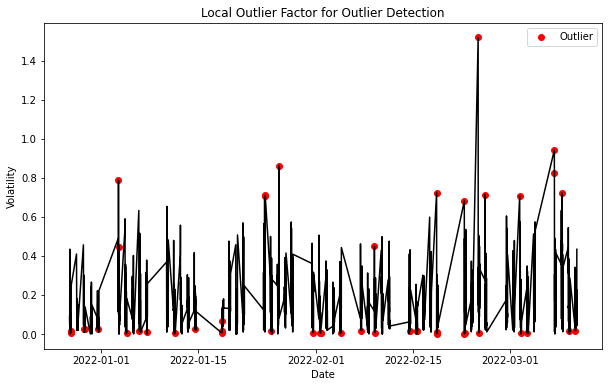

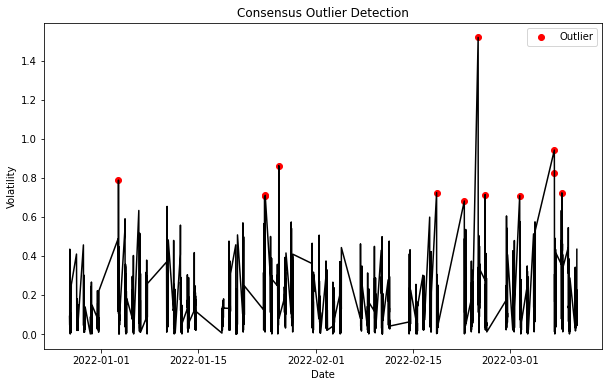

In [36]:
# Oracle
orcl = pd.read_csv('oracle.csv')
orcl = flipOrder(orcl)
calculateVolatility(orcl)
setDateIndex(orcl)
plotVolatility(orcl, stockName="Google")

orclVolDf = pd.DataFrame(orcl['Volatility']) 

isoForestOutliers(orclVolDf)
lofOutliers(orclVolDf)
zOutliers = computeZscoreOutliers(orclVolDf)

findConsensusOutliers(orclVolDf, zOutliers)

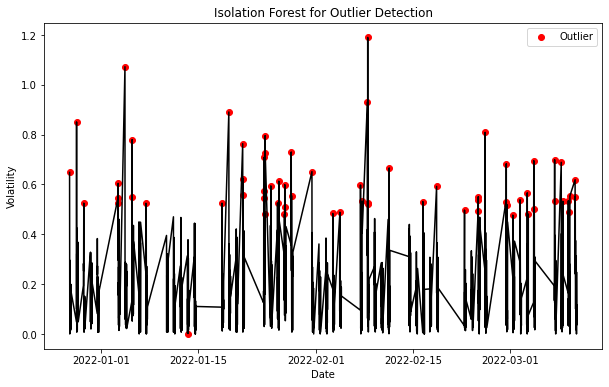

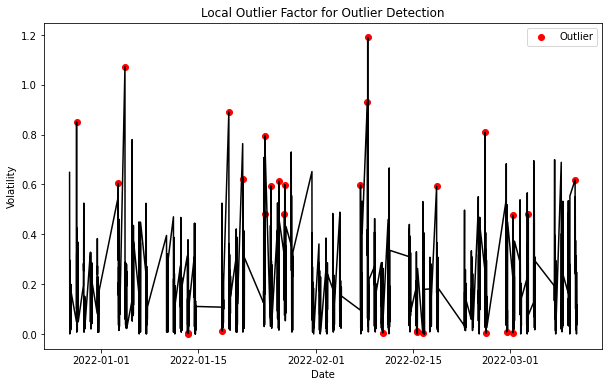

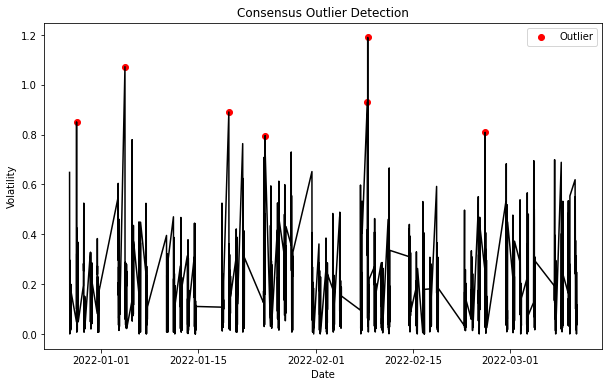

In [37]:
# Pfizer
pfe = pd.read_csv('pfizer.csv')
pfe = flipOrder(pfe)
calculateVolatility(pfe)
setDateIndex(pfe)
plotVolatility(pfe, stockName="Pfizer")

pfeVolDf = pd.DataFrame(pfe['Volatility']) 

isoForestOutliers(pfeVolDf)
lofOutliers(pfeVolDf)
zOutliers = computeZscoreOutliers(pfeVolDf)

findConsensusOutliers(pfeVolDf, zOutliers)

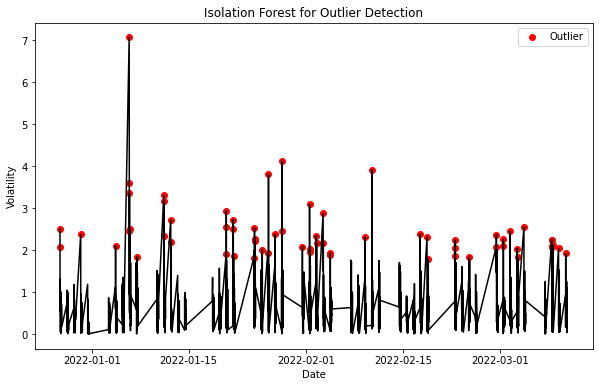

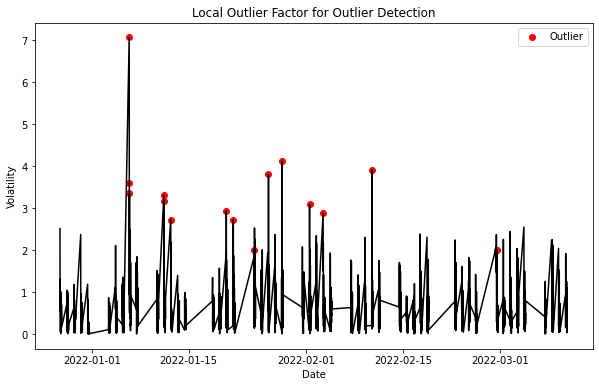

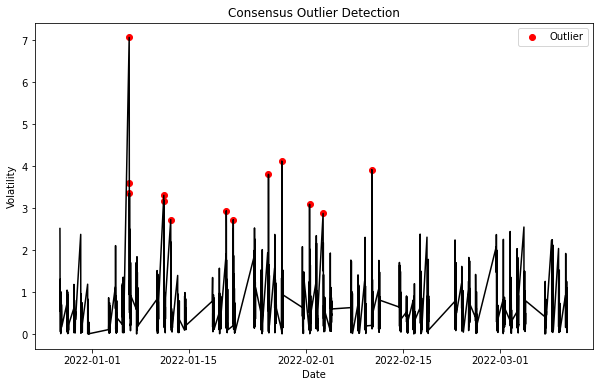

In [38]:
# Rivian
rivn = pd.read_csv('rivian.csv')
rivn = flipOrder(rivn)
calculateVolatility(rivn)
setDateIndex(rivn)
plotVolatility(rivn, stockName="Rivian")

rivnVolDf = pd.DataFrame(rivn['Volatility']) 

isoForestOutliers(rivnVolDf)
lofOutliers(rivnVolDf)
zOutliers = computeZscoreOutliers(rivnVolDf)

findConsensusOutliers(rivnVolDf, zOutliers)

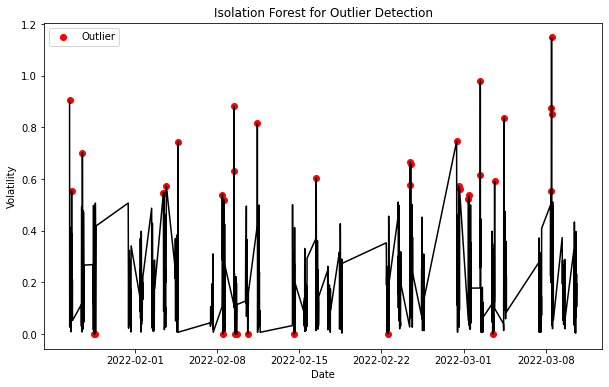

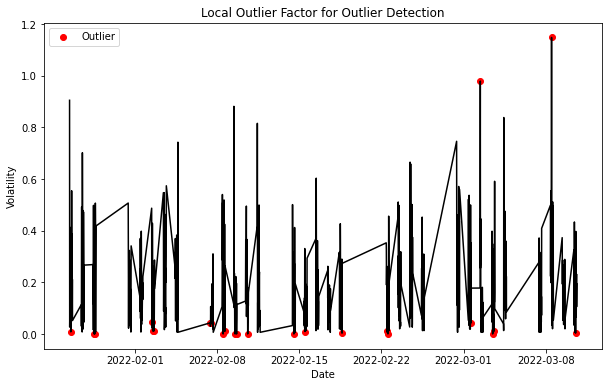

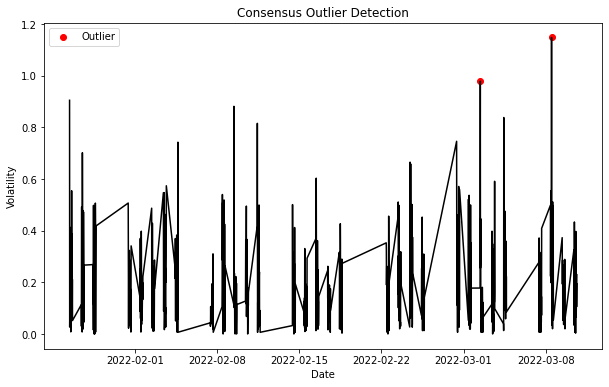

In [39]:
# T-Mobile
tmus = pd.read_csv('tmobile.csv')
tmus = flipOrder(tmus)
calculateVolatility(tmus)
setDateIndex(tmus)
plotVolatility(tmus, stockName="T-Mobile")

tmusVolDf = pd.DataFrame(tmus['Volatility']) 

isoForestOutliers(tmusVolDf)
lofOutliers(tmusVolDf)
zOutliers = computeZscoreOutliers(tmusVolDf)

findConsensusOutliers(tmusVolDf, zOutliers)

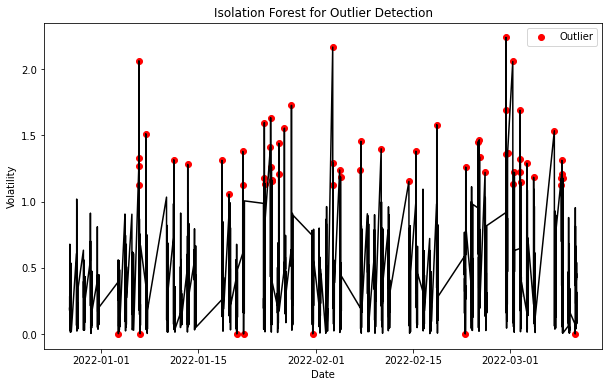

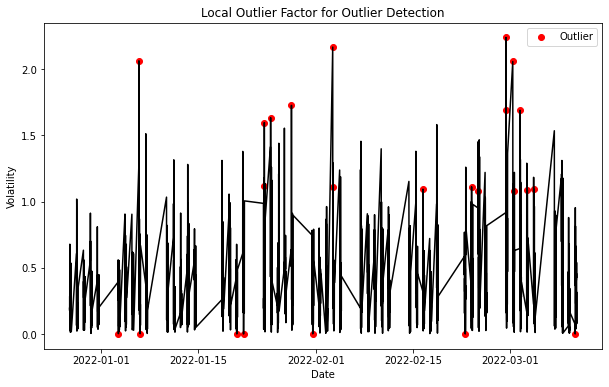

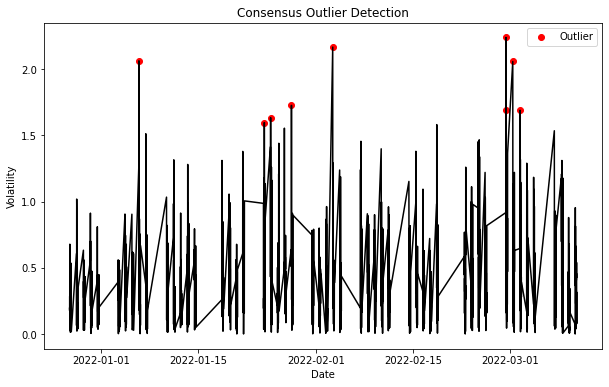

In [40]:
# Zoom
zm = pd.read_csv('zoom.csv')
zm = flipOrder(zm)
calculateVolatility(zm)
setDateIndex(zm)
plotVolatility(zm, stockName="Zoom")

zmVolDf = pd.DataFrame(zm['Volatility']) 

isoForestOutliers(zmVolDf)
lofOutliers(zmVolDf)
zOutliers = computeZscoreOutliers(zmVolDf)

findConsensusOutliers(zmVolDf, zOutliers)

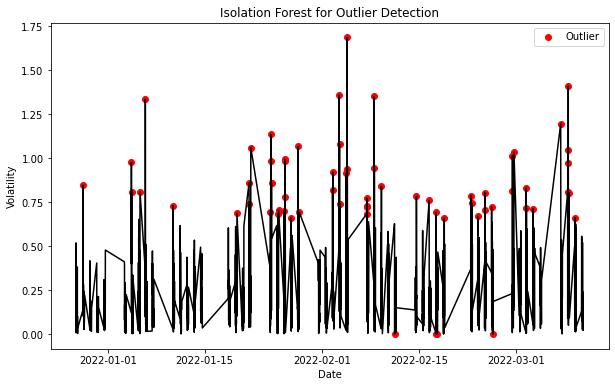

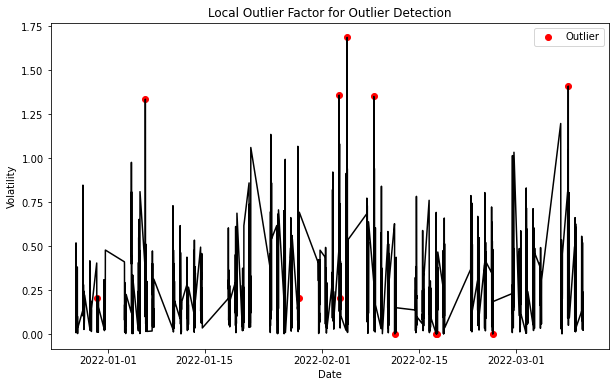

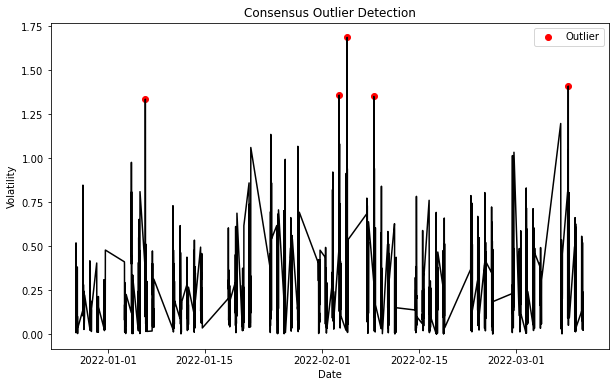

In [41]:
# Meta
fb = pd.read_csv('meta.csv')
fb = flipOrder(fb)
calculateVolatility(fb)
setDateIndex(fb)
plotVolatility(fb, stockName="Meta")

fbVolDf = pd.DataFrame(fb['Volatility']) 

isoForestOutliers(fbVolDf)
lofOutliers(fbVolDf)
zOutliers = computeZscoreOutliers(fbVolDf)

findConsensusOutliers(fbVolDf, zOutliers)